# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Deny Wisnu Saputro Sukisno
- **Email:** deniwisnu250.dw@gmail.com
- **ID Dicoding:** denywisnu

## Menentukan Pertanyaan Bisnis

- How is the trend in the number of bicycle users in recent years?
- Which season has the most cyclists?
- What are the usage patterns of bike-sharing services by day of the week?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

## Data Wrangling

### Gathering Data

Load Data day

In [2]:
day = pd.read_csv('day.csv')
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Load Data hour

In [3]:
hour = pd.read_csv('hour.csv')
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

assessing tabel day

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day.shape

(731, 16)

In [6]:
day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
print("Jumlah duplikasi: ", day.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Summary Day Table

- The data type of the dteday column is object, so later it must be converted to datetime
- The data Day have 731 rows and 16 columns
- Don't have missing value or data duplicate

assessing tabel hour

In [9]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour.shape

(17379, 17)

In [11]:
hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0


not duplicate data in hour table

In [13]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Summary Hour Data

- The data type of the dteday column is object, so later it must be converted to datetime
- The data Day have 17379 rows and 17 columns
- Don't have missing value or data duplicate

### Cleaning Data

#### Convert dteday from object to datetime

In [14]:
hour['dteday'] = pd.to_datetime(hour['dteday'])
hour['dteday'].info

<bound method Series.info of 0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]>

#### Convert several columns from integer to categorical

In [15]:
hour['season'] = hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour['mnth'] = hour['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour['weathersit'] = hour['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})
hour['weekday'] = hour['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [16]:
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,1,Dec,19,0,Mon,1,Misty/Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,1,Dec,20,0,Mon,1,Misty/Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,1,Dec,21,0,Mon,1,Clear/Partly Cloudy,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,1,Dec,22,0,Mon,1,Clear/Partly Cloudy,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

Explore Day Table

In [17]:
day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
110,111,2011-04-21,2,0,4,0,4,1,1,0.459167,0.453892,0.407083,0.325258,745,3444,4189
206,207,2011-07-26,3,0,7,0,2,1,1,0.771667,0.696979,0.540833,0.200258,750,3840,4590
454,455,2012-03-30,2,1,3,0,5,1,2,0.370000,0.375621,0.580833,0.138067,796,4663,5459
465,466,2012-04-10,2,1,4,0,2,1,1,0.446667,0.436233,0.435000,0.249375,819,5099,5918
226,227,2011-08-15,3,0,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338


In [18]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [19]:
day.dteday.is_unique

True

In [20]:
day.dteday.duplicated

<bound method Series.duplicated of 0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
726    2012-12-27
727    2012-12-28
728    2012-12-29
729    2012-12-30
730    2012-12-31
Name: dteday, Length: 731, dtype: object>

In [21]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [22]:
day.season.is_unique

False

Explore Hour Table

In [23]:
hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14519,14520,2012-09-02,Fall,1,Sep,4,0,Sun,0,Clear/Partly Cloudy,0.66,0.5909,0.89,0.0000,7,15,22
14016,14017,2012-08-12,Fall,1,Aug,5,0,Sun,0,Clear/Partly Cloudy,0.64,0.6212,0.61,0.1940,1,9,10
10043,10044,2012-02-28,Spring,1,Feb,12,0,Tue,1,Clear/Partly Cloudy,0.36,0.3485,0.34,0.1343,19,164,183
4065,4066,2011-06-23,Fall,0,Jun,7,0,Thu,1,Misty/Cloudy,0.72,0.6970,0.74,0.1343,26,301,327
5573,5574,2011-08-25,Fall,0,Aug,3,0,Thu,1,Clear/Partly Cloudy,0.66,0.6212,0.74,0.3284,2,2,4


In [24]:
hour.duplicated().sum()

0

In [25]:
hour.groupby(by='hr').agg({
    'cnt': ['min', 'max', 'mean', 'sum']
})

cnt                         
   min  max        mean     sum
hr                             
0    2  283   53.898072   39130
1    1  168   33.375691   24164
2    1  132   22.869930   16352
3    1   79   11.727403    8174
4    1   28    6.352941    4428
5    1   66   19.889819   14261
6    1  213   76.044138   55132
7    1  596  212.064649  154171
8    5  839  359.011004  261001
9   14  426  219.309491  159438
10   8  539  173.668501  126257
11  10  663  208.143054  151320
12   3  776  253.315934  184414
13  11  760  253.661180  184919
14  12  750  240.949246  175652
15   7  750  251.233196  183149
16  11  783  311.983562  227748
17  15  976  461.452055  336860
18  23  977  425.510989  309772
19  11  743  311.523352  226789
20  11  567  226.030220  164550
21   6  584  172.314560  125445
22   9  502  131.335165   95612
23   2  256   87.831044   63941

## Visualization & Explanatory Analysis

### How is the trend in the number of bicycle users in recent years?

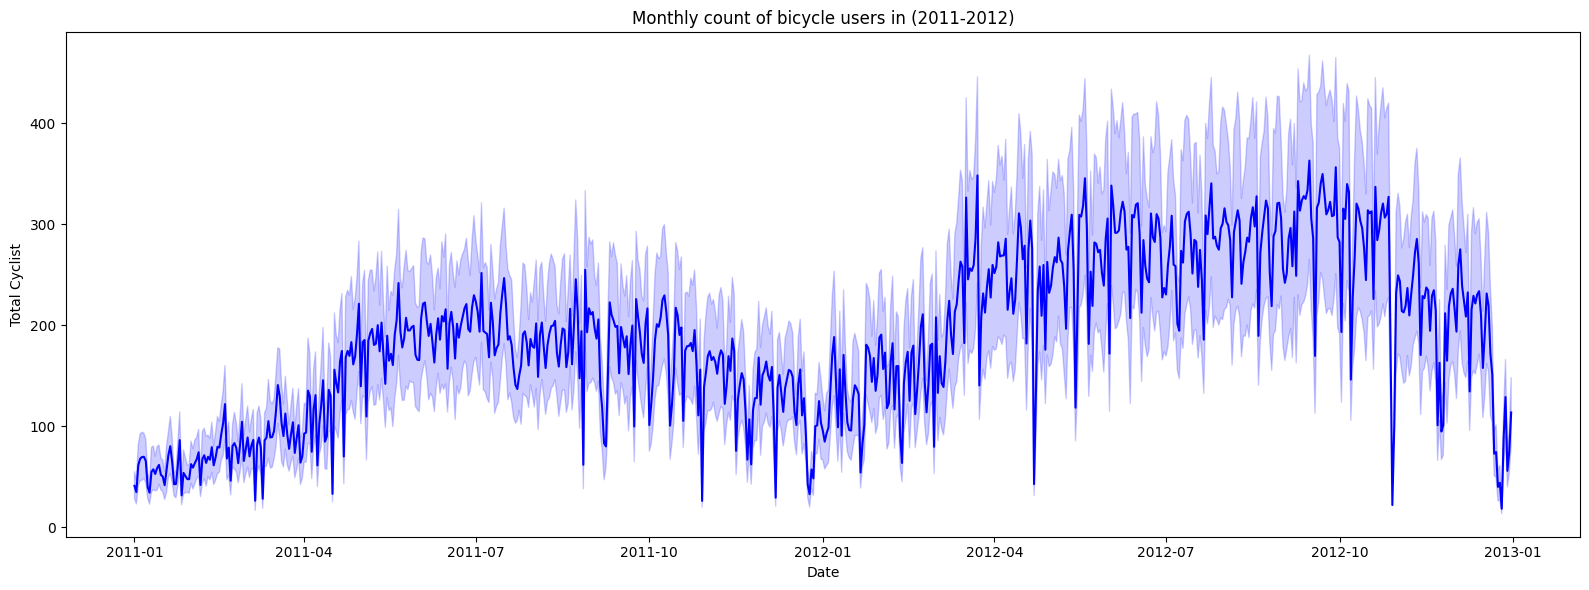

In [26]:
# Set Figure
plt.figure(figsize=(16,6))

# Create lineplot
sns.lineplot(x="dteday", y="cnt", data=hour, color='blue')

# Assign labels and title
plt.xlabel("Date")
plt.ylabel("Total Cyclist")
plt.title("Monthly count of bicycle users in (2011-2012)")

# Show plot
plt.tight_layout()
plt.show()

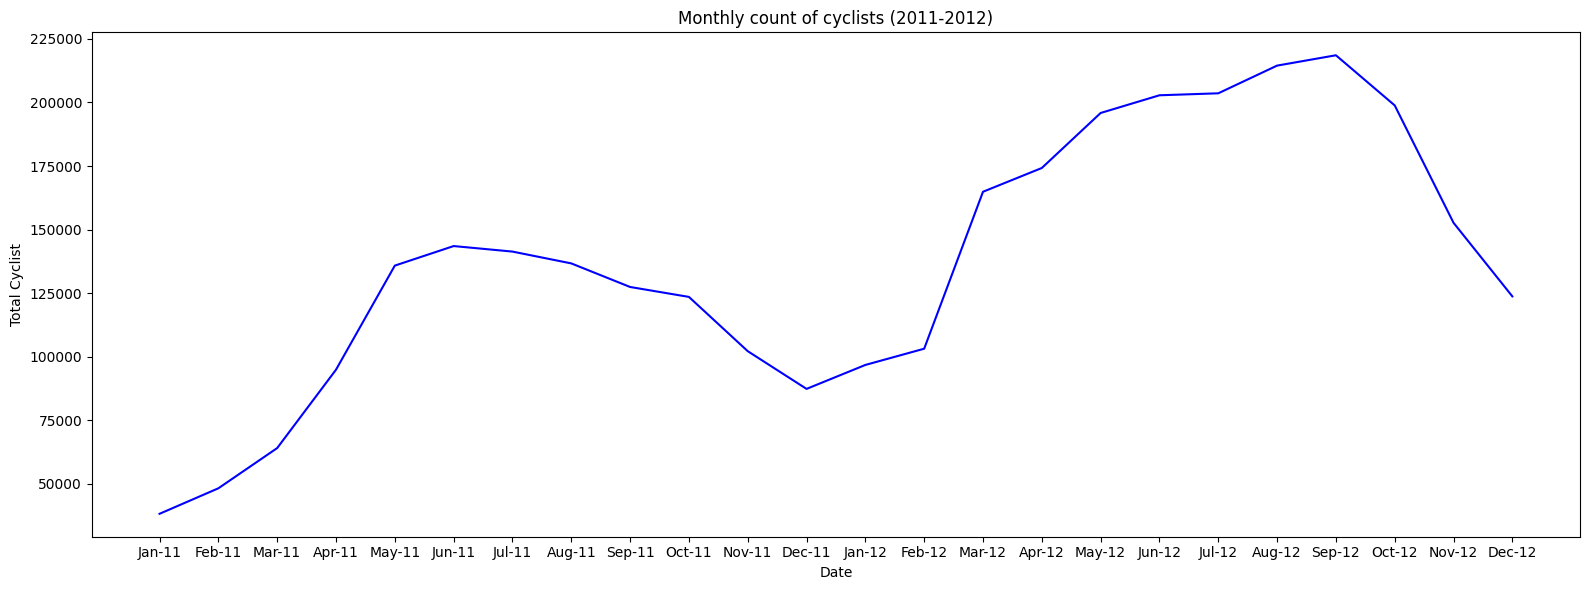

In [27]:
# Resample data on a monthly basis and aggregate
monthly_users = hour.resample(rule='M', on='dteday').sum()

# Format the index to display month and year
monthly_users.index = monthly_users.index.strftime('%b-%y')

# Create a line plot
plt.figure(figsize=(16, 6))
sns.lineplot(data=monthly_users['cnt'], color='blue')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Total Cyclist")
plt.title("Monthly count of cyclists (2011-2012)")

# Display the plot
plt.tight_layout()
plt.show()

### Which season has the most cyclists?

C:\Users\Asus\AppData\Local\Temp\ipykernel_17708\3102363522.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])


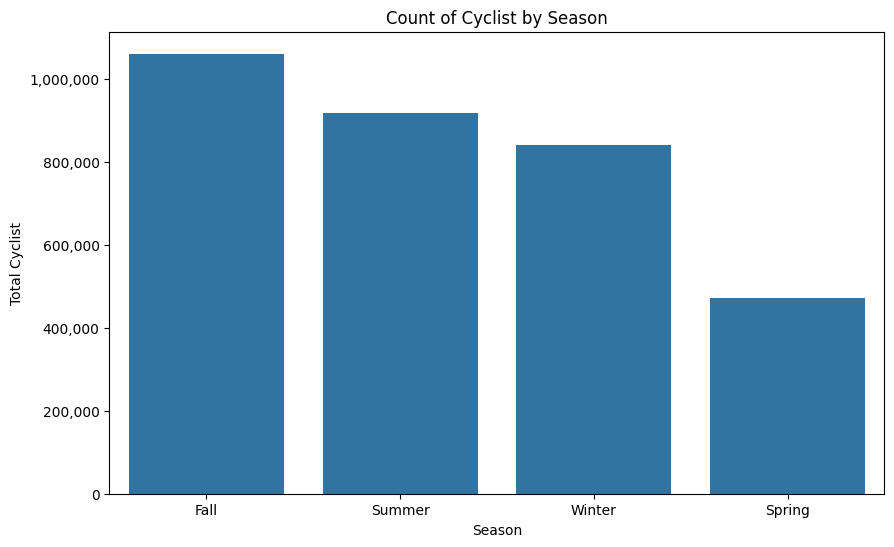

In [28]:
# Count the number of users by season
season_users = hour.groupby("season")["cnt"].sum().reset_index()

# Urutkan musim berdasarkan jumlah pengguna dari yang terbanyak
season_users = season_users.sort_values(by="cnt", ascending=False)

# Determine the seasonal order
season_order = season_users["season"].unique()

# Create Barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x="season", y="cnt", data=season_users, order=season_order)
plt.xlabel("Season")
plt.ylabel("Total Cyclist")
plt.title("Count of Cyclist by Season")

# Format label sumbu y
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

plt.show()

### What are the usage patterns of bike-sharing services by day of the week?

C:\Users\Asus\AppData\Local\Temp\ipykernel_17708\4229021803.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])


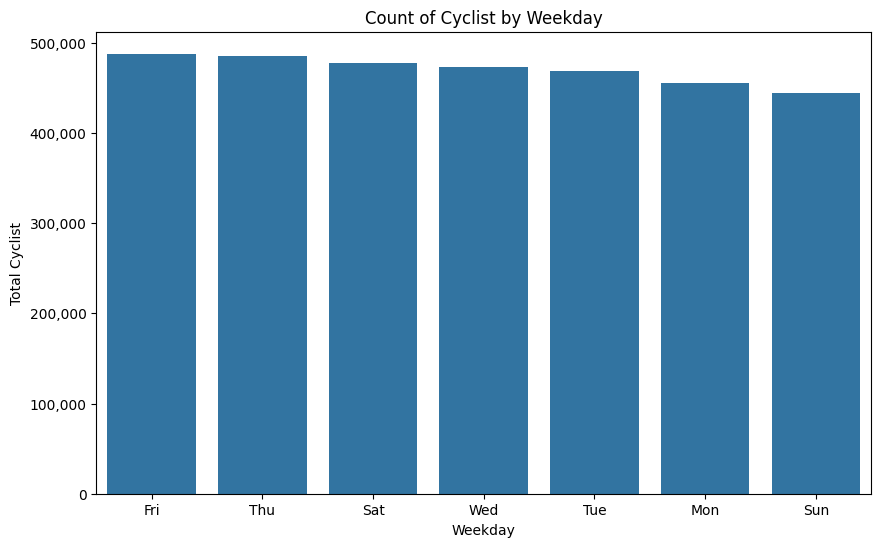

In [29]:
# Count the number of users by season
weekday_users = hour.groupby("weekday")["cnt"].sum().reset_index()

# Urutkan musim berdasarkan jumlah pengguna dari yang terbanyak
weekday_users = weekday_users.sort_values(by="cnt", ascending=False)

# Determine the seasonal order
weekday_order = weekday_users["weekday"].unique()

# Create Barplot
plt.figure(figsize=(10,6))
ax = sns.barplot(x="weekday", y="cnt", data=weekday_users, order=weekday_order)
plt.xlabel("Weekday")
plt.ylabel("Total Cyclist")
plt.title("Count of Cyclist by Weekday")

# Format label sumbu y
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

plt.show()

## Conclusion

- from the sales trend (2011-2012), every time approaching the end of the year always decreases, especially when December becomes the peak of the decline. the increase occurs between May-September.
- In Spring, there are less cyclists than in other seasons, which could be due to certain factors that cause a decline in cyclists' interest.
- it turns out that there are less cyclists on Sundays than other days, we must explore why because Sundays are holidays which should increase cyclists.